### Linear Regression with Gradient Descent from Scratch

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, alpha=1e-3, iters=1000):
        self.alpha = alpha
        self.iters = iters
        self.w = None
        self.b = None

    def _init_params(self):
        """Initialize weights and bias to zeros."""
        self.w = np.zeros(self.n)
        self.b = 0

    def update_param(self, dw, db):
        """Update weights and bias using gradients."""
        self.w -= self.alpha * dw
        self.b -= self.alpha * db

    def predict(self, X):
        """Return predicted values for input X."""
        return np.dot(X, self.w) + self.b

    def gradients(self, X, y, y_pred):
        """Compute gradients for weights and bias."""
        e = y_pred - y
        dw = (1 / self.m) * np.dot(X.T, e)
        db = (1 / self.m) * np.sum(e)
        return dw, db

    def fit(self, X, y):
        """Train the model using gradient descent."""
        self.m, self.n = X.shape
        self._init_params()

        for _ in range(self.iters):
            y_pred = self.predict(X)
            dw, db = self.gradients(X, y, y_pred)
            self.update_param(dw, db)

    def final_predict(self, X):
        """Return final predictions after training."""
        return self.predict(X)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

# RMSE calculation
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y) ** 2))

# Load and generate regression data
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train model
lr = LinearRegression(alpha=0.01, iters=1000)
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.final_predict(X_test)

# Evaluate performance
print(f"Root Mean Squared Error (RMSE): {rmse(y_test, y_pred):.4f}")





Root Mean Squared Error (RMSE): 20.4880


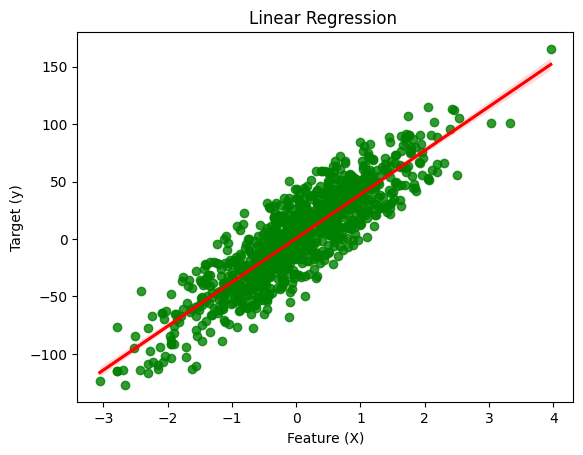

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# X and y are your data arrays
sns.regplot(x=X.flatten(), y=y, color="green", line_kws={"color": "red"})

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression ")
plt.show()
